# Инициализация

Загружаем библиотеки необходимые для выполнения кода ноутбука.

In [6]:
import os
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

In [9]:
pd.options.mode.chained_assignment = None

## Загрузка первичных данных
Загружаем первичные данные из файла:

data/train_ver2.csv

In [10]:
data = pd.read_csv("data/train_ver2.csv")

/tmp/ipykernel_6636/2597651704.py:1: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/train_ver2.csv")


## Обзор данных

Проверяем данные, есть ли с ними явные проблемы.

In [11]:
data.head(10)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
5,2015-01-28,1050615,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
6,2015-01-28,1050616,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
7,2015-01-28,1050617,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
8,2015-01-28,1050619,N,ES,H,24,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
9,2015-01-28,1050620,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

In [13]:
data.describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07,1.364731e+07,1.364731e+07,1.364731e+07,...,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.363125e+07,1.363125e+07,1.364731e+07
mean,8.349042e+05,5.956184e-02,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05,1.022912e-04,2.315475e-05,6.554837e-01,...,5.886582e-03,9.170965e-03,2.627404e-03,5.253636e-02,4.438868e-02,2.560761e-02,3.847718e-03,5.472434e-02,5.942854e-02,1.279162e-01
std,4.315650e+05,2.366733e-01,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05,1.011340e-02,4.811883e-03,4.752103e-01,...,7.649791e-02,9.532502e-02,5.119083e-02,2.231060e-01,2.059571e-01,1.579616e-01,6.191053e-02,2.274414e-01,2.364250e-01,3.339965e-01
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.528130e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.318930e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.199286e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.553689e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Можно заметить, что значение в колонке ```tipodom``` одинаковое для всех записей, удалим её

In [14]:
data['tipodom'].value_counts()

tipodom
1.0    13619574
Name: count, dtype: int64

In [15]:
data.drop(columns=['tipodom'], inplace=True)

In [16]:
# Удалим столбец nomprov так как он не бдует использоваться в дальнейшем
data.drop(columns=['nomprov'], inplace=True)

In [17]:
# Проверяем пропущенные значения
data.isna().sum()

fecha_dato                      0
ncodpers                        0
ind_empleado                27734
pais_residencia             27734
sexo                        27804
age                             0
fecha_alta                  27734
ind_nuevo                   27734
antiguedad                      0
indrel                      27734
ult_fec_cli_1t           13622516
indrel_1mes                149781
tiprel_1mes                149781
indresi                     27734
indext                      27734
conyuemp                 13645501
canal_entrada              186126
indfall                     27734
cod_prov                    93591
ind_actividad_cliente       27734
renta                     2794375
segmento                   189368
ind_ahor_fin_ult1               0
ind_aval_fin_ult1               0
ind_cco_fin_ult1                0
ind_cder_fin_ult1               0
ind_cno_fin_ult1                0
ind_ctju_fin_ult1               0
ind_ctma_fin_ult1               0
ind_ctop_fin_u

In [18]:
# Заполним колонки с числовыми значениями и приведем их к типу numeric
numeric_columns = ['age', 'antiguedad', 'renta']

for col in numeric_columns:
    data[col] = data[col].astype(str).str.strip()
    data[col] = data[col].replace(['NA', ''], np.nan)
    data[col] = pd.to_numeric(data[col], errors='coerce')
    data[col] = data[col].fillna(data[col].median())

In [19]:
# Удалим колонки с большим количеством пропусков (более 99% в нашем случае)
data.drop(columns=['ult_fec_cli_1t', 'conyuemp'], inplace=True)

In [20]:
# Найдем колонки, которые могут быть описаны как бинарные
boolean_columns = [
    col for col in data.columns 
    if data[col].nunique() == 2
]
data[boolean_columns].sample(3, random_state=42)

,sexo,ind_nuevo,indrel,indresi,indext,indfall,ind_actividad_cliente,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
2406613,H,0.0,1.0,S,N,N,1.0,0,0,0,...,0,0,0,0,1,0,0,0.0,0.0,0
6466267,H,0.0,1.0,S,N,N,0.0,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
10239289,V,0.0,1.0,S,N,N,0.0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [21]:
# Приведем типы данных
datetime_columns = ['fecha_dato', 'fecha_alta']
categorical_columns = [
    'ind_empleado', 'pais_residencia', 'indrel_1mes', 'tiprel_1mes', 
    'canal_entrada', 'indfall', 'segmento'
]

for col in datetime_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

for col in categorical_columns:
    data[col] = data[col].astype('category')

for col in boolean_columns:
    if col in ['indresi', 'indext', 'indfall']:
        data[col] = data[col].map({'S': True, 'N': False})
    elif col == 'sexo':
        data[col] = data[col].map({'H': True, 'V': False})

    data[col] = data[col].fillna(False).astype(bool).infer_objects()

/tmp/ipykernel_6636/837059084.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].fillna(False).astype(bool).infer_objects()
/tmp/ipykernel_6636/837059084.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].fillna(False).astype(bool).infer_objects()
/tmp/ipykernel_6636/837059084.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('f

In [22]:
# Проверяем дубликаты
data.duplicated().sum()

np.int64(0)

Явные дубликаты в данных отсутствуют

In [23]:
# Количество уникальных клиентов
data['ncodpers'].nunique()

956645

В результате мы избавись от пропущеных значений в некатегориальных столбцах, привели типы данных к более удобным для использования и тем самым значительно оптимизировали работу с памятью. 

## EDA

In [24]:
# Посмотрим распределения целевых переменных
target_columns = [col for col in data.columns if col.startswith('ind_') and col.endswith('_ult1')]

column_names = {
    "ind_ahor_fin_ult1": "Сберегательный счёт",
    "ind_aval_fin_ult1": "Банковская гарантия",
    "ind_cco_fin_ult1": "Текущие счета",
    "ind_cder_fin_ult1": "Деривативный счёт",
    "ind_cno_fin_ult1": "Зарплатный проект",
    "ind_ctju_fin_ult1": "Детский счёт",
    "ind_ctma_fin_ult1": "Особый счёт 3",
    "ind_ctop_fin_ult1": "Особый счёт",
    "ind_ctpp_fin_ult1": "Особый счёт 2",
    "ind_deco_fin_ult1": "Краткосрочный депозит",
    "ind_deme_fin_ult1": "Среднесрочный депозит",
    "ind_dela_fin_ult1": "Долгосрочный депозит",
    "ind_ecue_fin_ult1": "Цифровой счёт",
    "ind_fond_fin_ult1": "Денежные средства",
    "ind_hip_fin_ult1": "Ипотека",
    "ind_plan_fin_ult1": "Пенсионный план",
    "ind_pres_fin_ult1": "Кредит",
    "ind_reca_fin_ult1": "Налоговый счёт",
    "ind_tjcr_fin_ult1": "Кредитная карта",
    "ind_valo_fin_ult1": "Ценные бумаги",
    "ind_viv_fin_ult1": "Домашний счёт",
    "ind_nomina_ult1": "Аккаунт для выплаты зарплаты",
    "ind_nom_pens_ult1": "Аккаунт для пенсионных обязательств",
    "ind_recibo_ult1": "Дебетовый аккаунт",
}

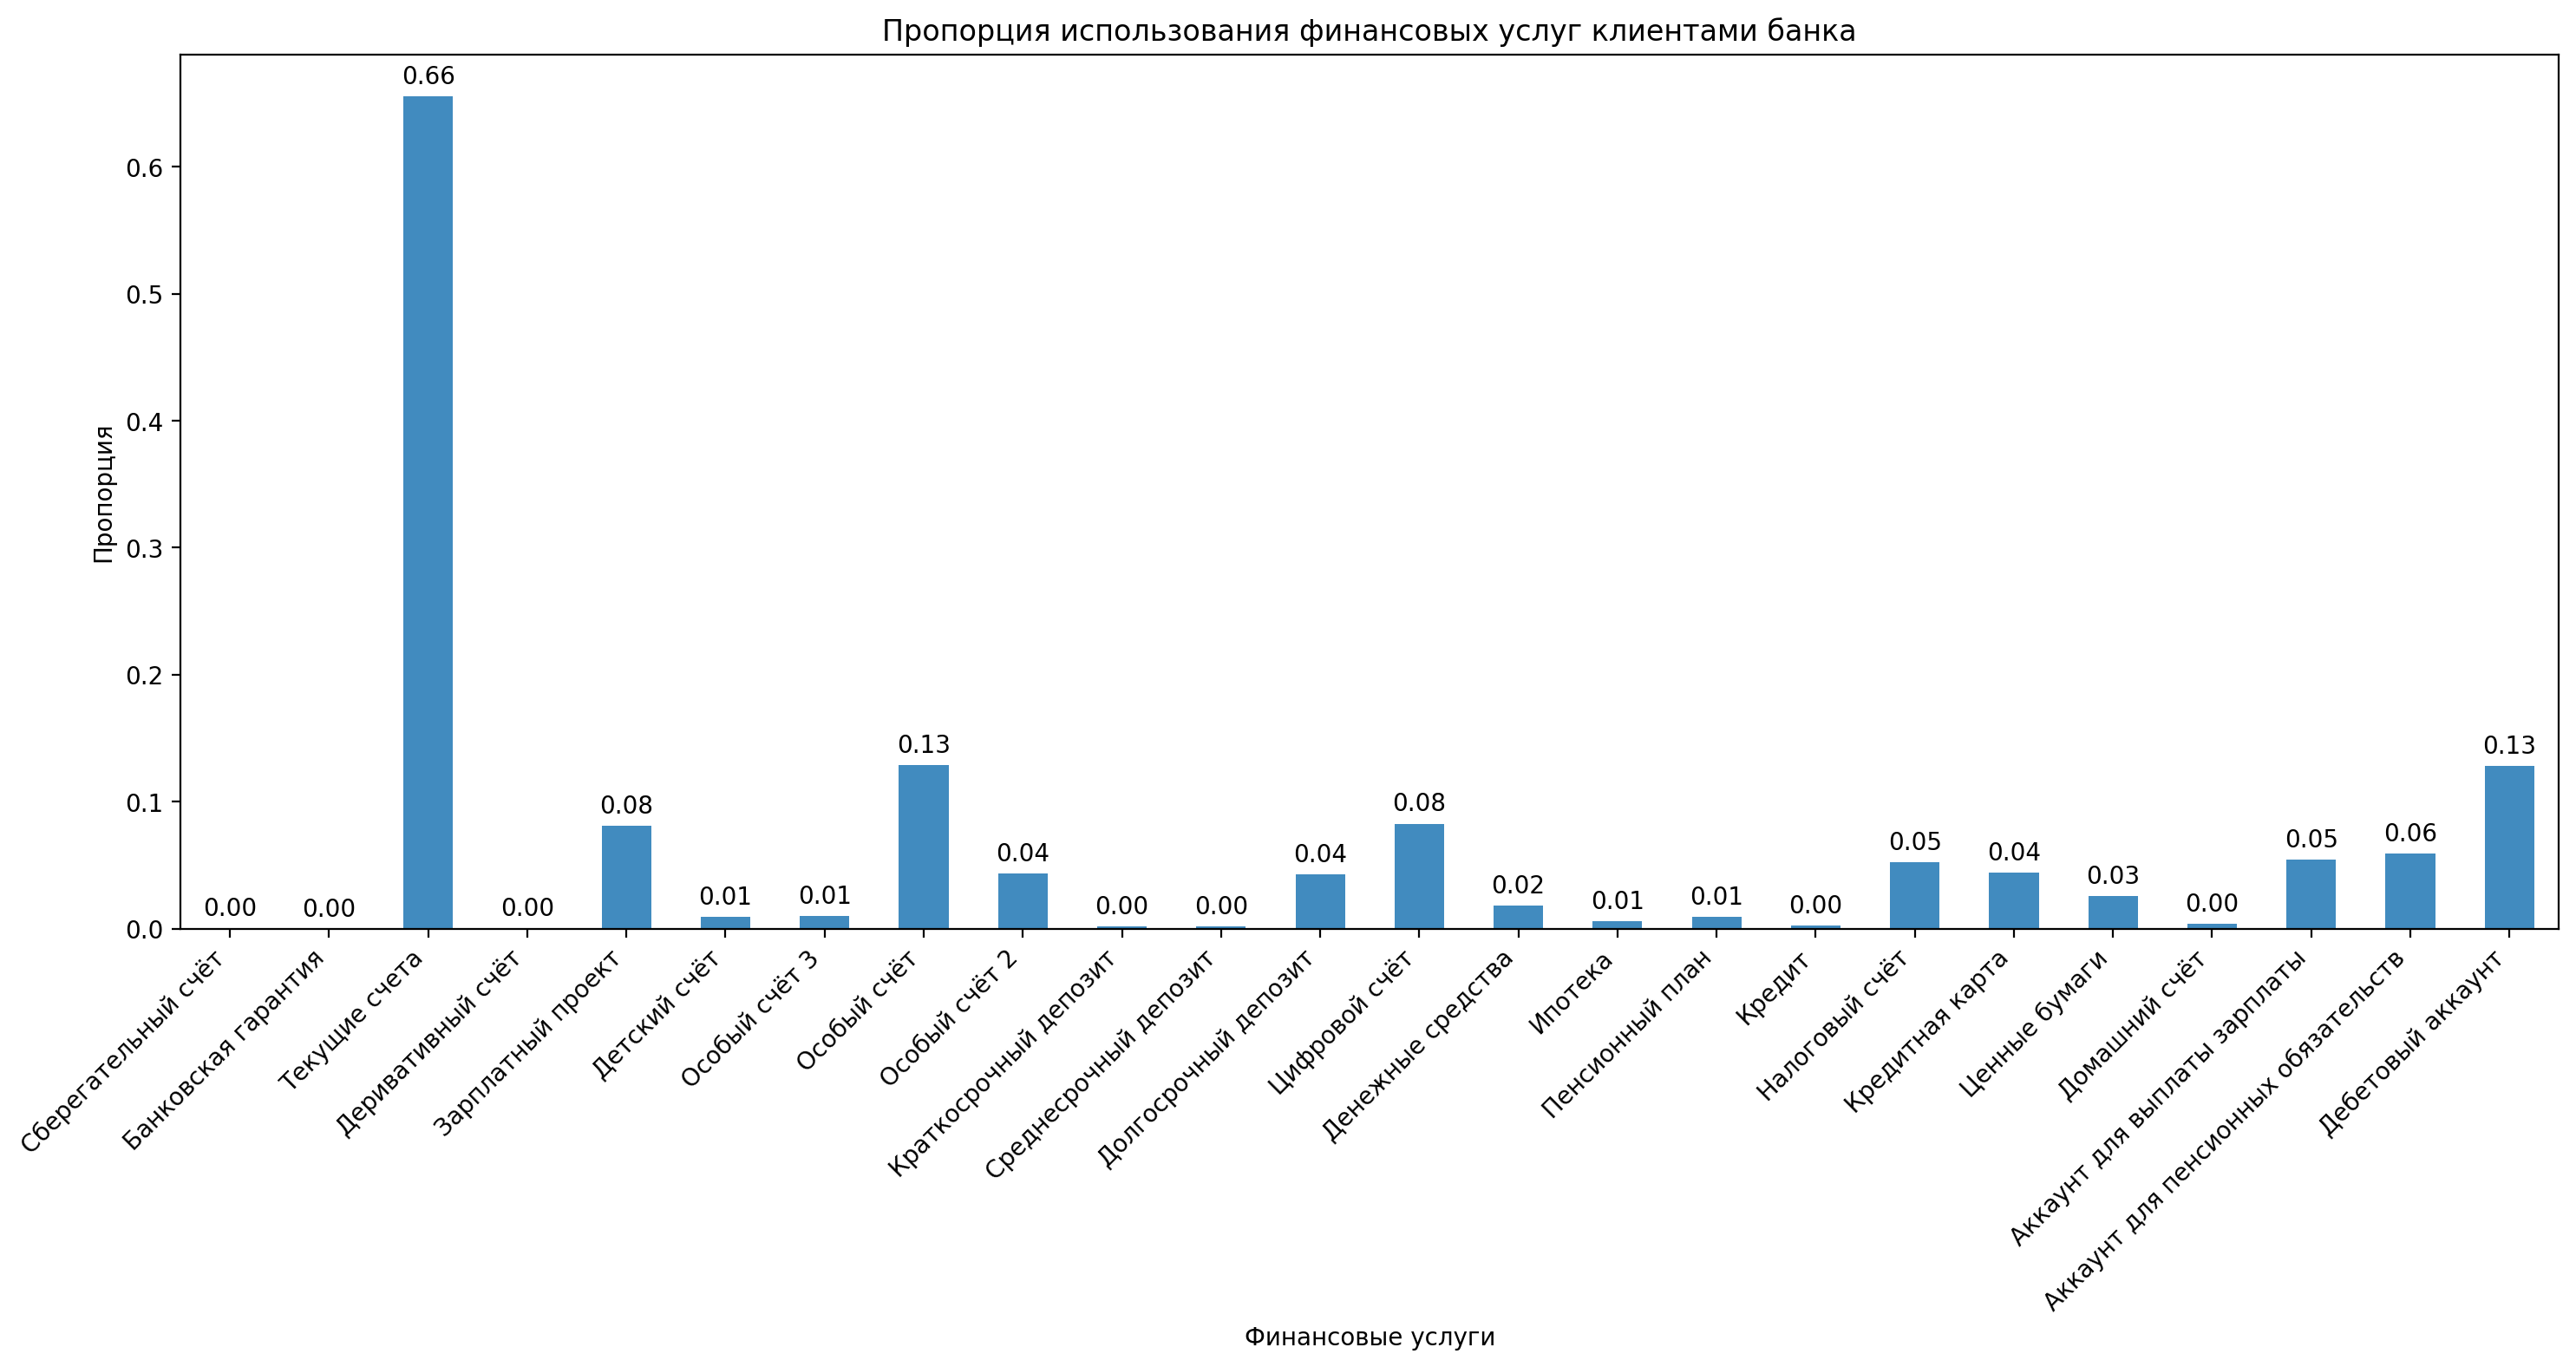

In [25]:
mean_values = data[target_columns].mean()

mean_values = mean_values.rename(index=column_names)

fig, ax = plt.subplots(figsize=(15, 8))

mean_values.plot(kind="bar", color="#1f77b4", alpha=0.85, ax=ax)

for idx, value in enumerate(mean_values):
    ax.text(idx, value + 0.01, f"{value:.2f}", ha='center', fontsize=10)

ax.set_title("Пропорция использования финансовых услуг клиентами банка")
ax.set_ylabel("Пропорция")
ax.set_xlabel("Финансовые услуги")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [26]:
mean_values.sort_values(ascending=False)[:5]

Текущие счета        0.655484
Особый счёт          0.129008
Дебетовый аккаунт    0.127916
Цифровой счёт        0.082744
Зарплатный проект    0.080867
dtype: float64

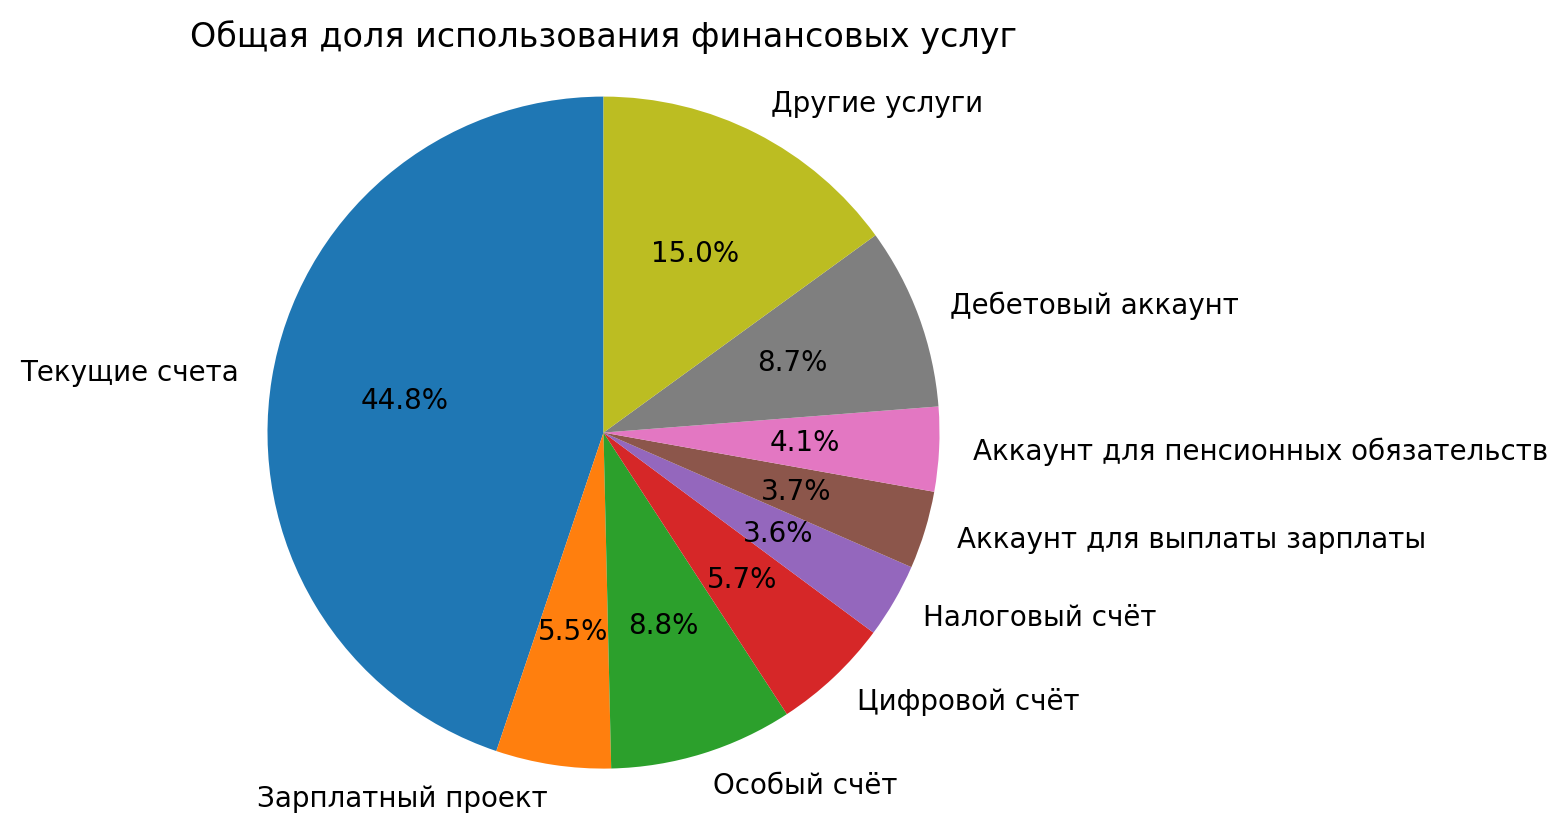

In [27]:
threshold = 0.05

others = mean_values[mean_values < threshold].sum()
chart_values = mean_values[mean_values >= threshold]
chart_values["Другие услуги"] = others

plt.pie(
    chart_values, 
    labels=chart_values.index, 
    autopct='%1.1f%%', 
    startangle=90
)
plt.title("Общая доля использования финансовых услуг")
plt.axis('equal')
plt.show()

Наиболее популярные услуги среди клиентов банка:
1. Текущие счета ```ind_cco_fin_ult1```: 65.5% клиентов имеют данную услугу. Это ожидаемо, так как банковский счет обычно является базовым продуктом.
2. Особый счёт ```ind_ctop_fin_ult1```: пользуются 12.9% клиентов.
3. Дебетовый аккаунт ```ind_recibo_ult1```: им пользуются 12.7% клиентов.
4. Цифровой счет ```ind_ecue_fin_ult1```: на него приходится 8.2% клиентов.
5. Зарплатный проект ```ind_cno_fin_ult1```: популярен у 8% клиентов.

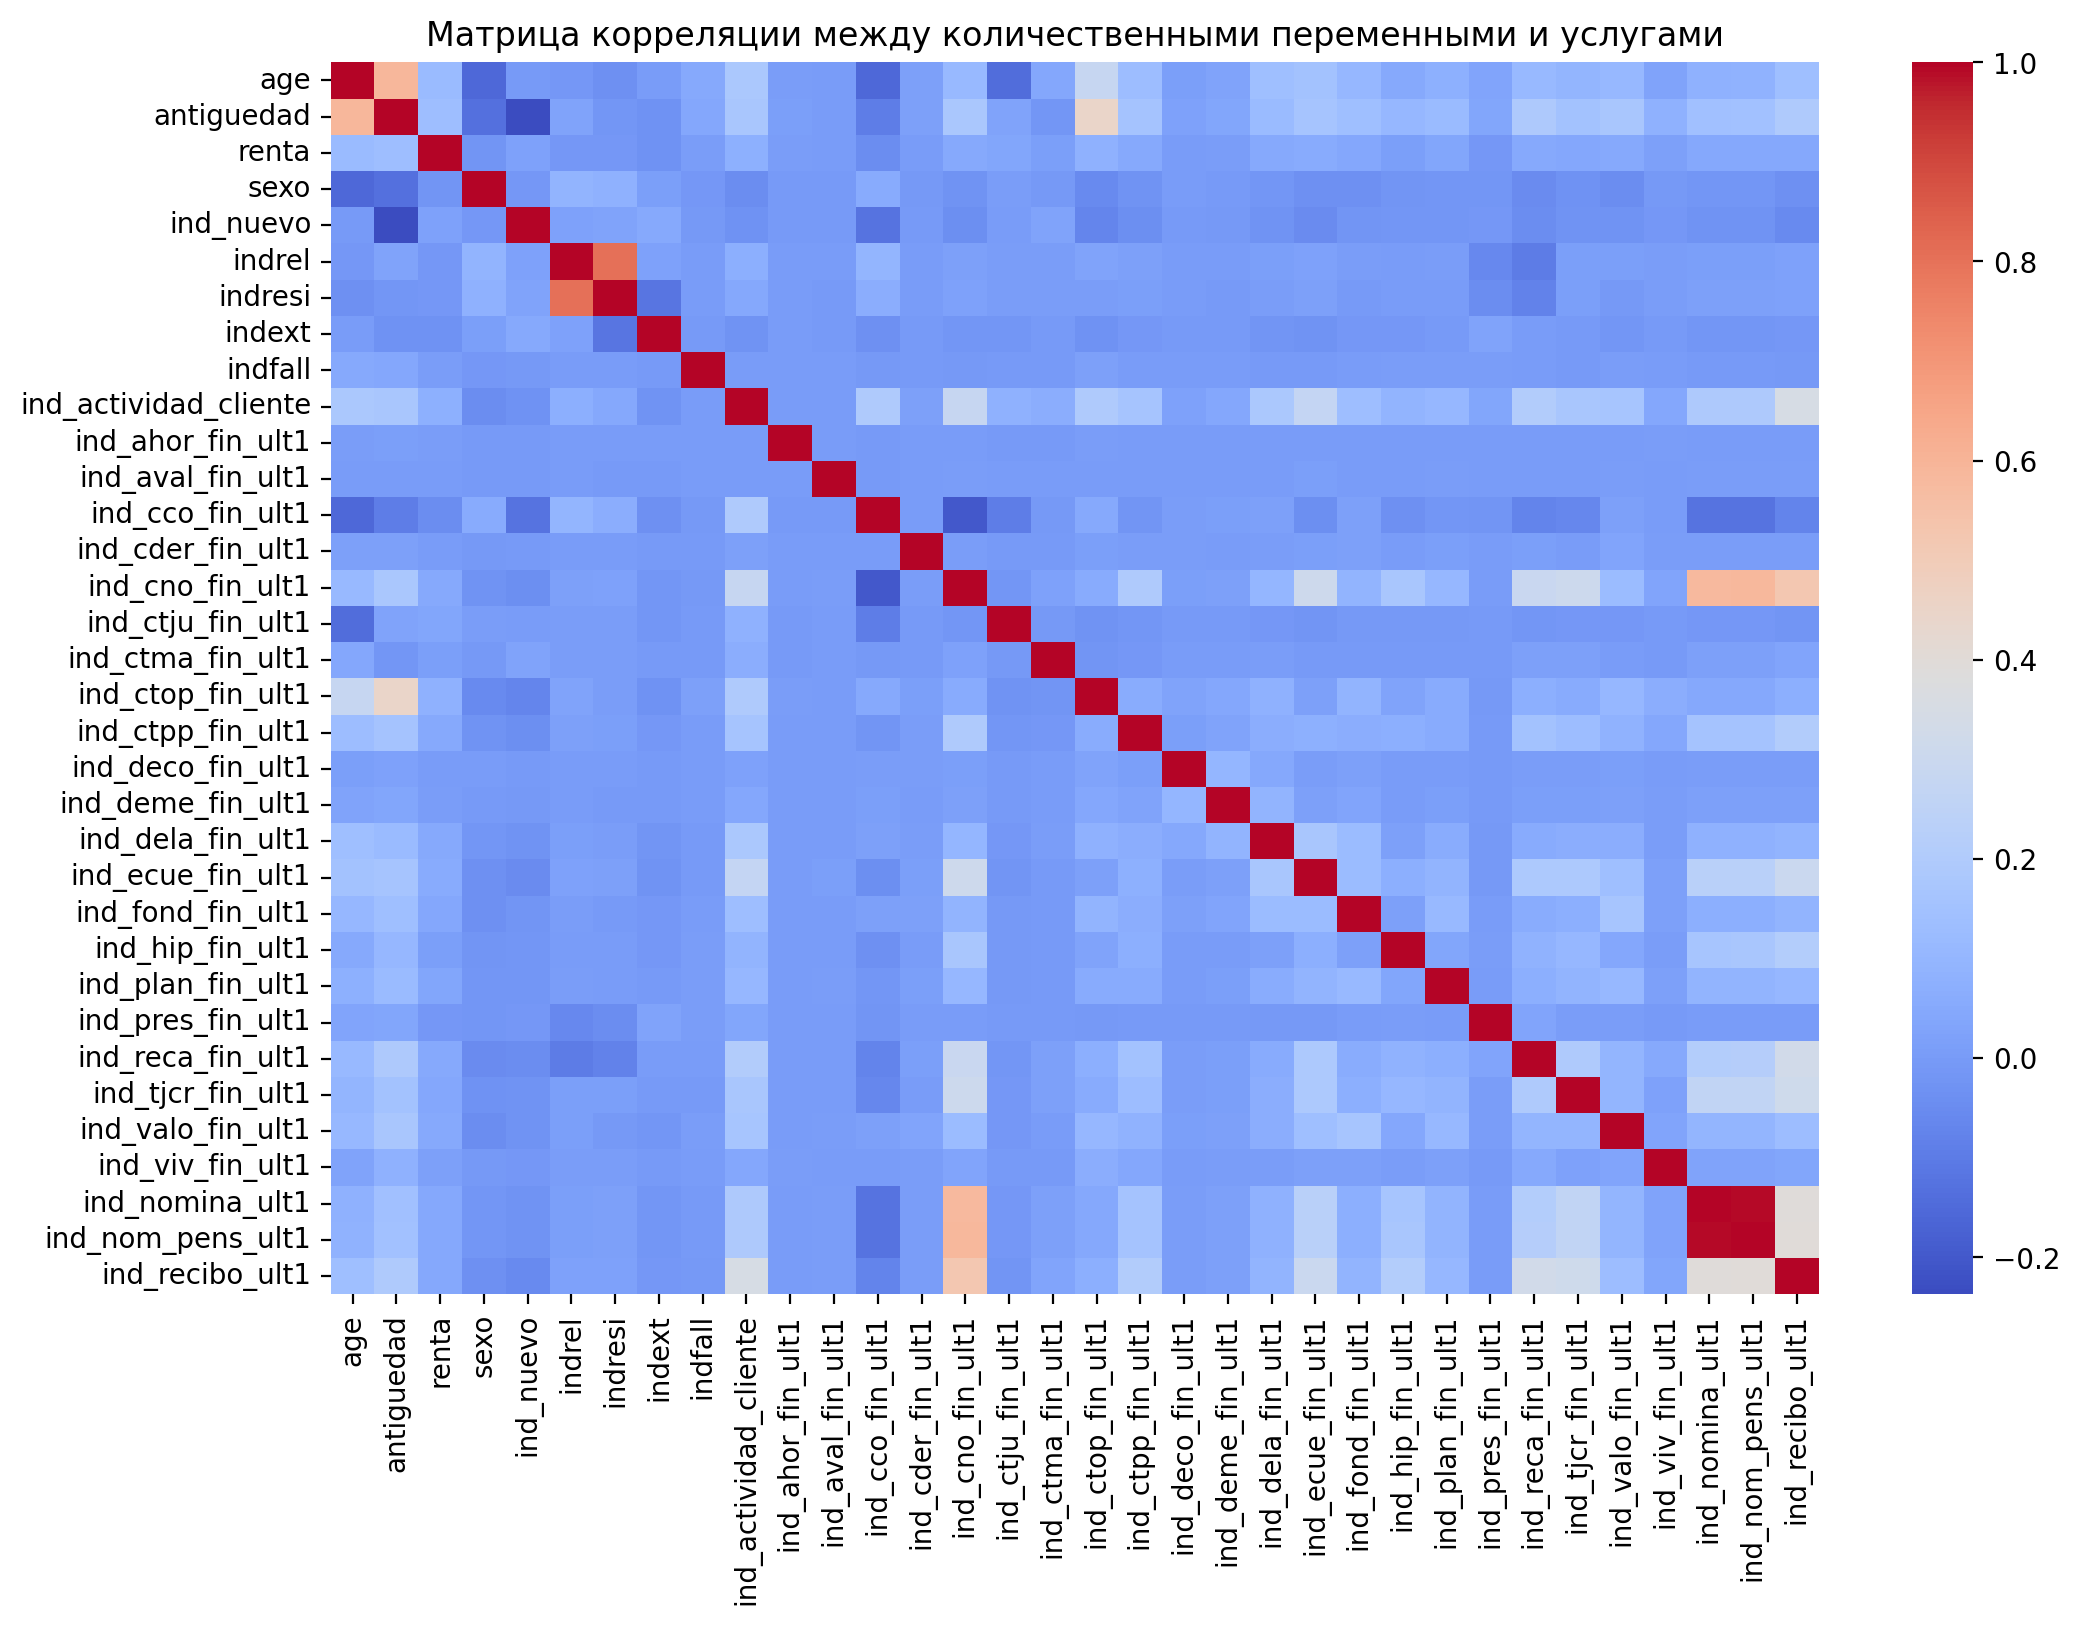

In [43]:
# Визуализируем корреляцию между признаками.
# Для этого предварительно аггрегируем данные (так как работаем с панельными данными)
data_numeric_only = data.groupby(['ncodpers'])[numeric_columns + boolean_columns].mean()

for col in data_numeric_only:
    data_numeric_only[col] = data_numeric_only[col].astype(int)

correlation_matrix = data_numeric_only.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=False,
    cmap="coolwarm",
    cbar=True,
    xticklabels=correlation_matrix.columns,
    yticklabels=correlation_matrix.columns
)
plt.title("Матрица корреляции между количественными переменными и услугами")
plt.show()

Услуга «Текущие счета» ```ind_cco_fin_ult1``` имеет высокую положительную корреляцию с  услугами «Аккаунт для выплаты зарплаты» ```ind_nomina_ult1```, «Аккаунт для пенсионных обязательств» ```ind_nom_pens_ult1``` и «Дебетовый аккаунт» ```ind_recibo_ult1``` и обратную корреляцию с услугой «Зарплатный проект» ```ind_nomina_ult1```. Занчит клиенты, имеющие текущий счет, с большей вероятностью пользуются и другими банковскими услугами, такими как дебетовые карты и зарплатные проекты.

Также «Аккаунт для выплаты зарплаты» имеет высокую негативную корреляцию с «Аккаунт для пенсионных обязательств» ```ind_nom_pens_ult1```. Это может означать, что клиенты, которые выбирают зарплатный проект, менее склонны открывать стандартный текущий счет в банке.

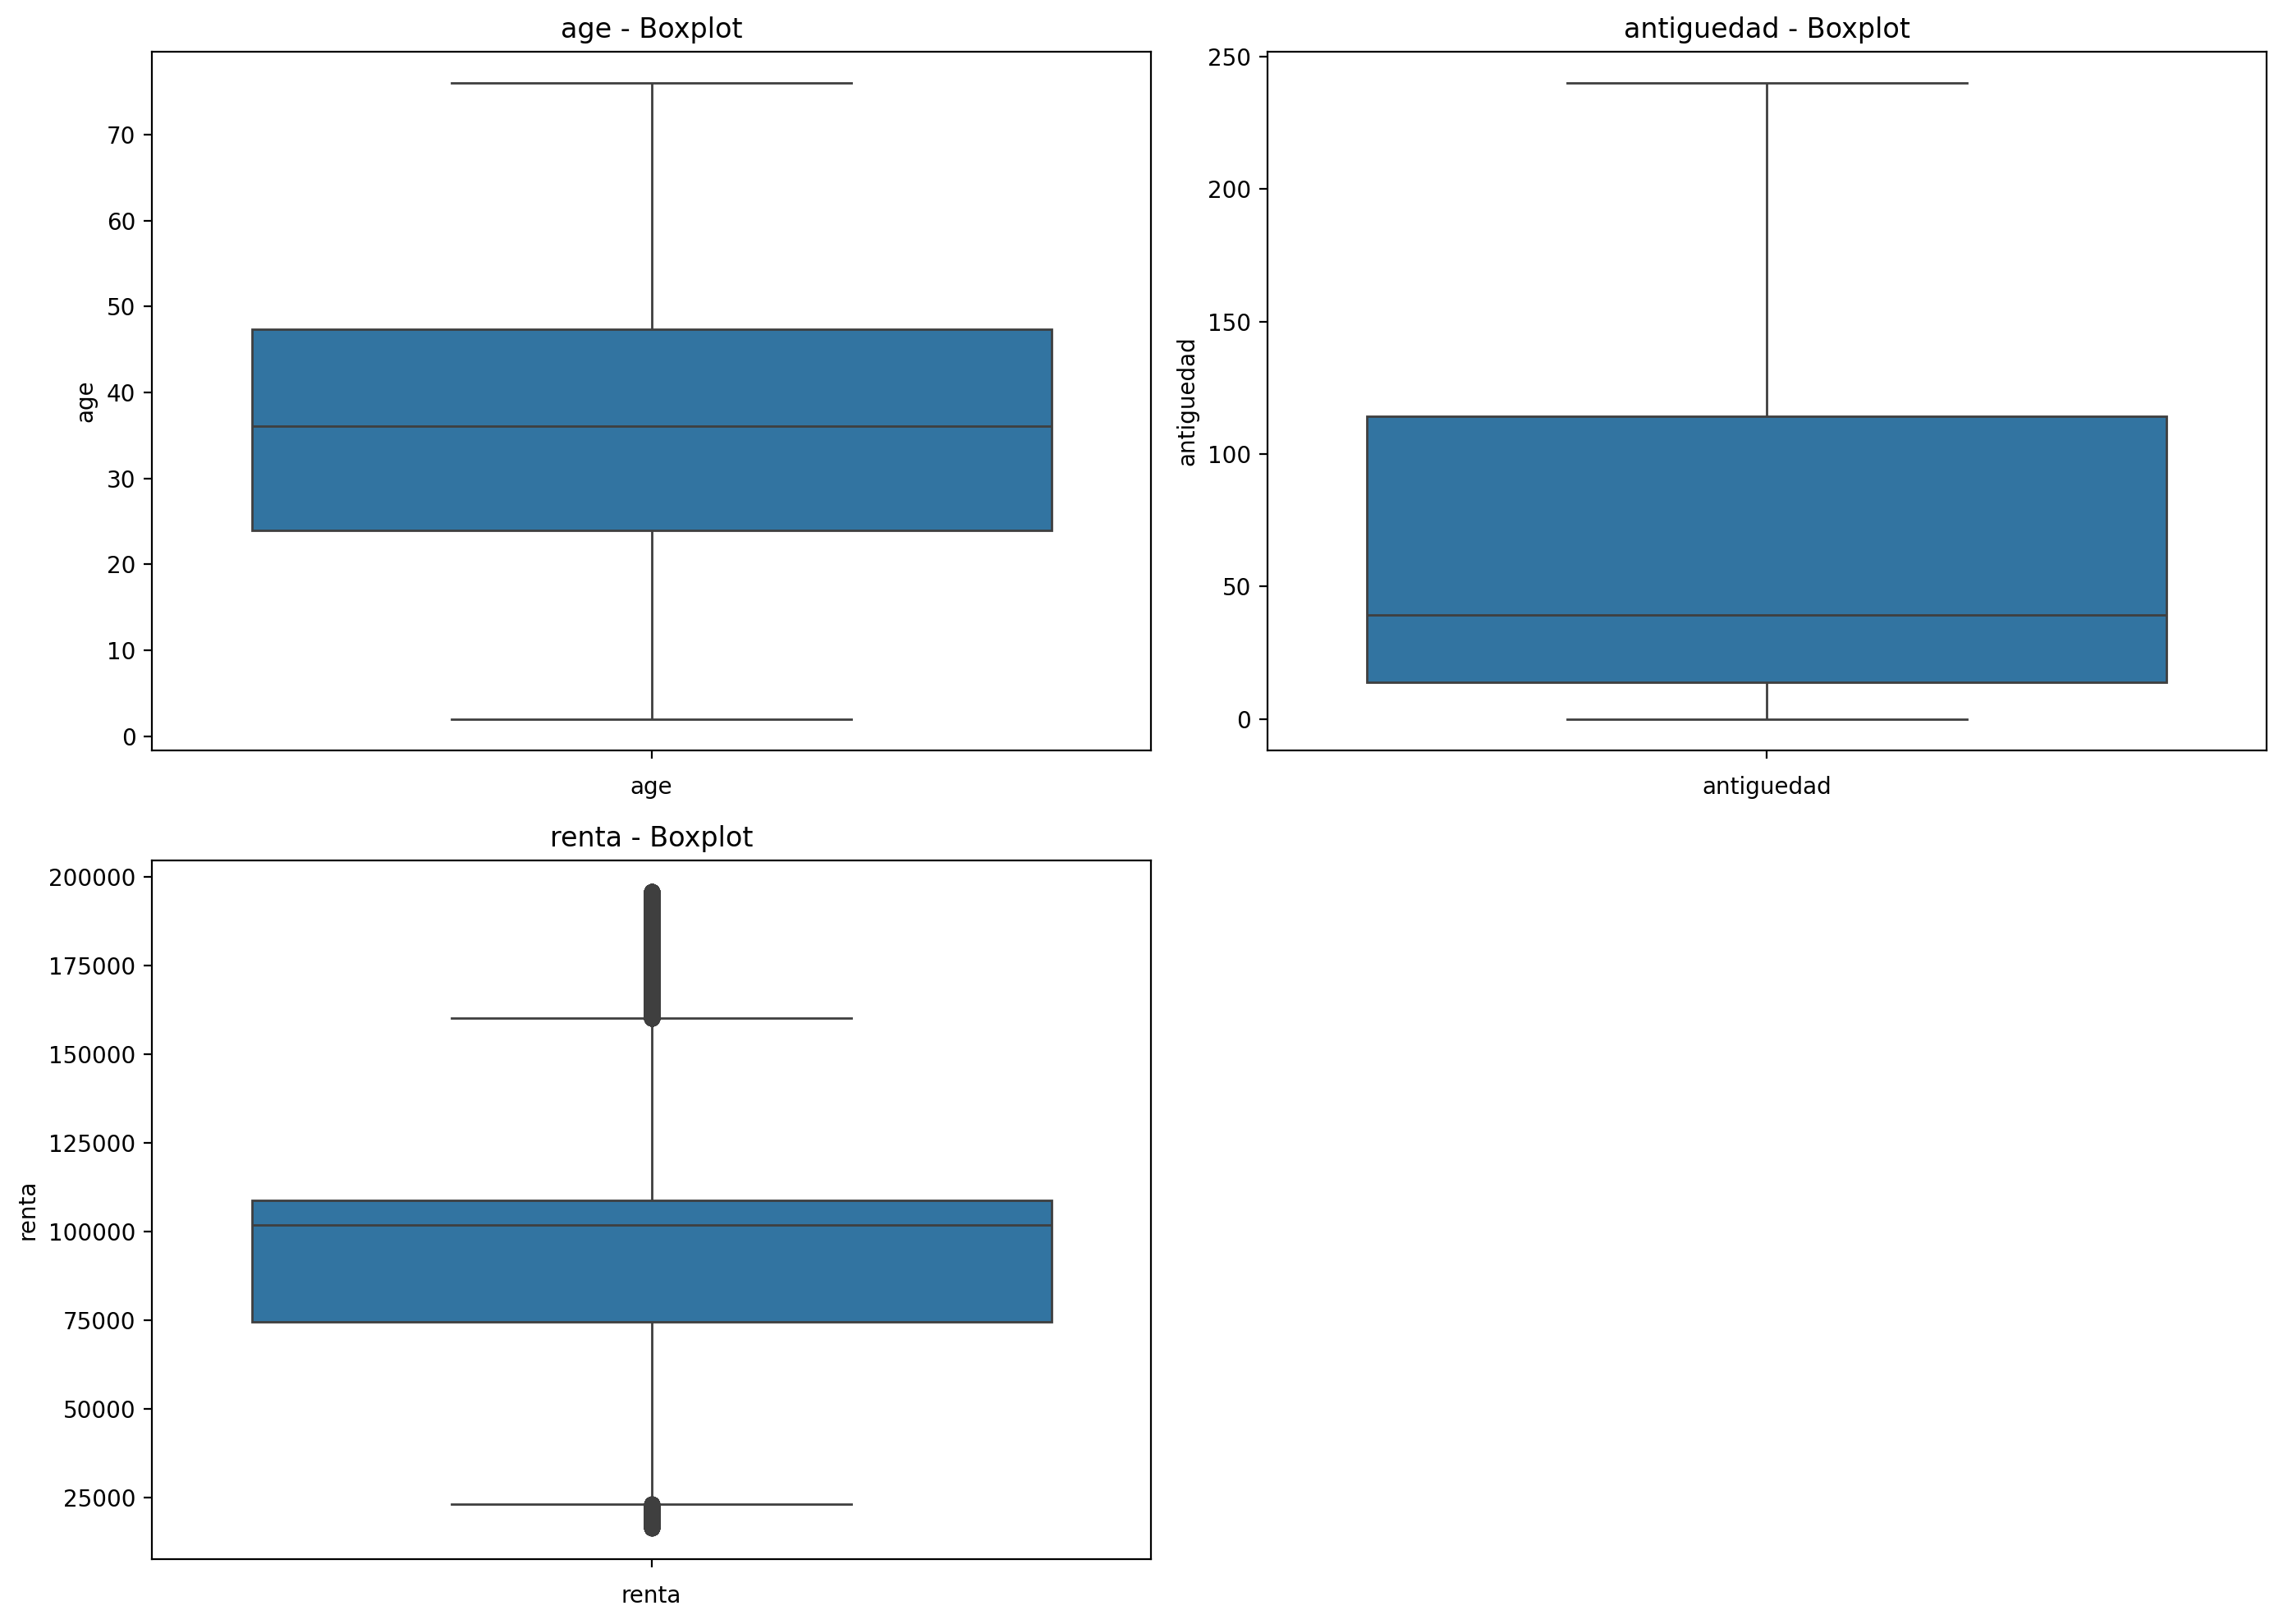

In [44]:
# Проверим колличественные данные на выбросы, для это визуализируем их распределение как ящик с усами
aggregated_data = data.groupby('ncodpers')[numeric_columns].mean()
plt.figure(figsize=(14, 10))

for i, col in enumerate(numeric_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(aggregated_data[col])
    plt.title(f'{col} - Boxplot')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

В данных присутствуют выбросы

In [32]:
# Исключим выбросы
def remove_outliers(df, numeric_columns):
    df_cleaned = df.copy()
    
    for col in numeric_columns:
        threshold = 1
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        df_cleaned = df_cleaned[(df[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    
    return df_cleaned

data = remove_outliers(data, numeric_columns)

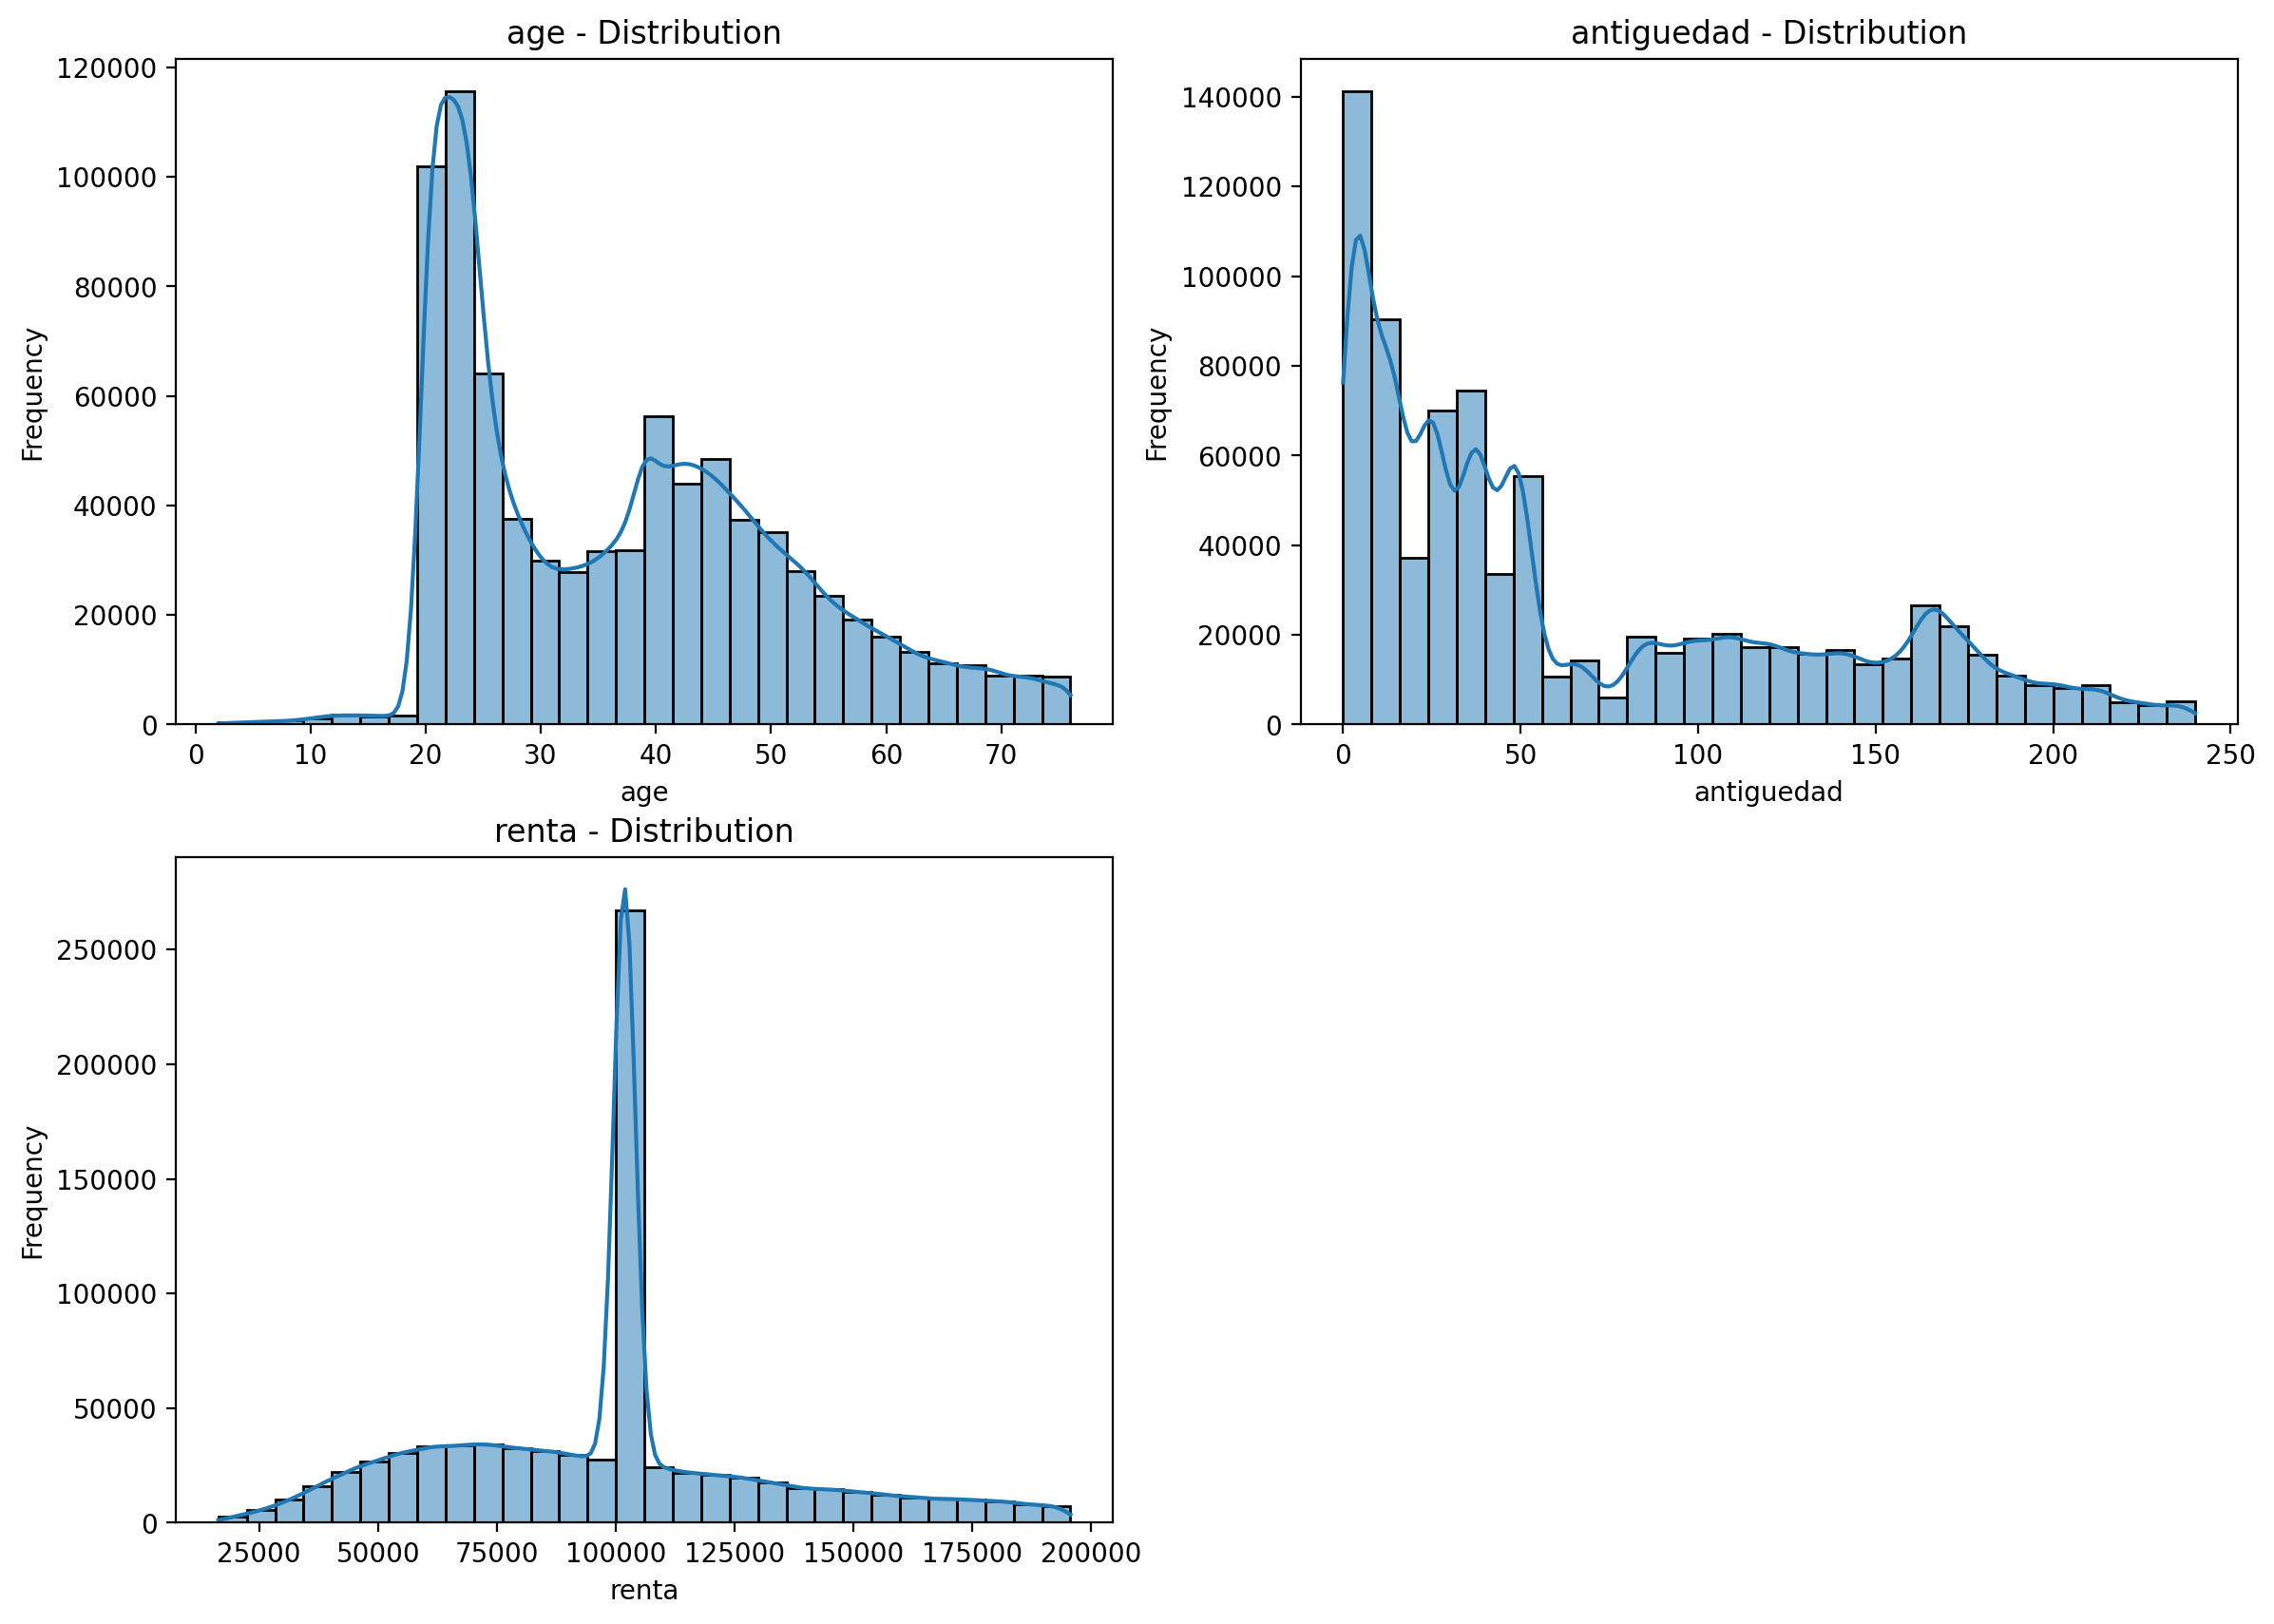

In [45]:
# Визуализируем распределение количественных переменных
plt.figure(figsize=(14, 10))

for i, col in enumerate(numeric_columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(aggregated_data[col], kde=True, bins=30)  # You can adjust 'bins' as necessary
    plt.title(f'{col} - Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

После того как данные были очищены от выбросов, мы получили репрезентативные гистограммы для количественных переменных

Можно выделить две возрастные категории 20-25 лет и 40-50, на них приходится наибольшее количество клиентов.

Значительная часть клиентов имеют стаж от 0 до 50 месяцев.

Распределение доходов сосредоточено в диапазоне (50 000 – 150 000) с пиком около 100000 (это медианный доход).

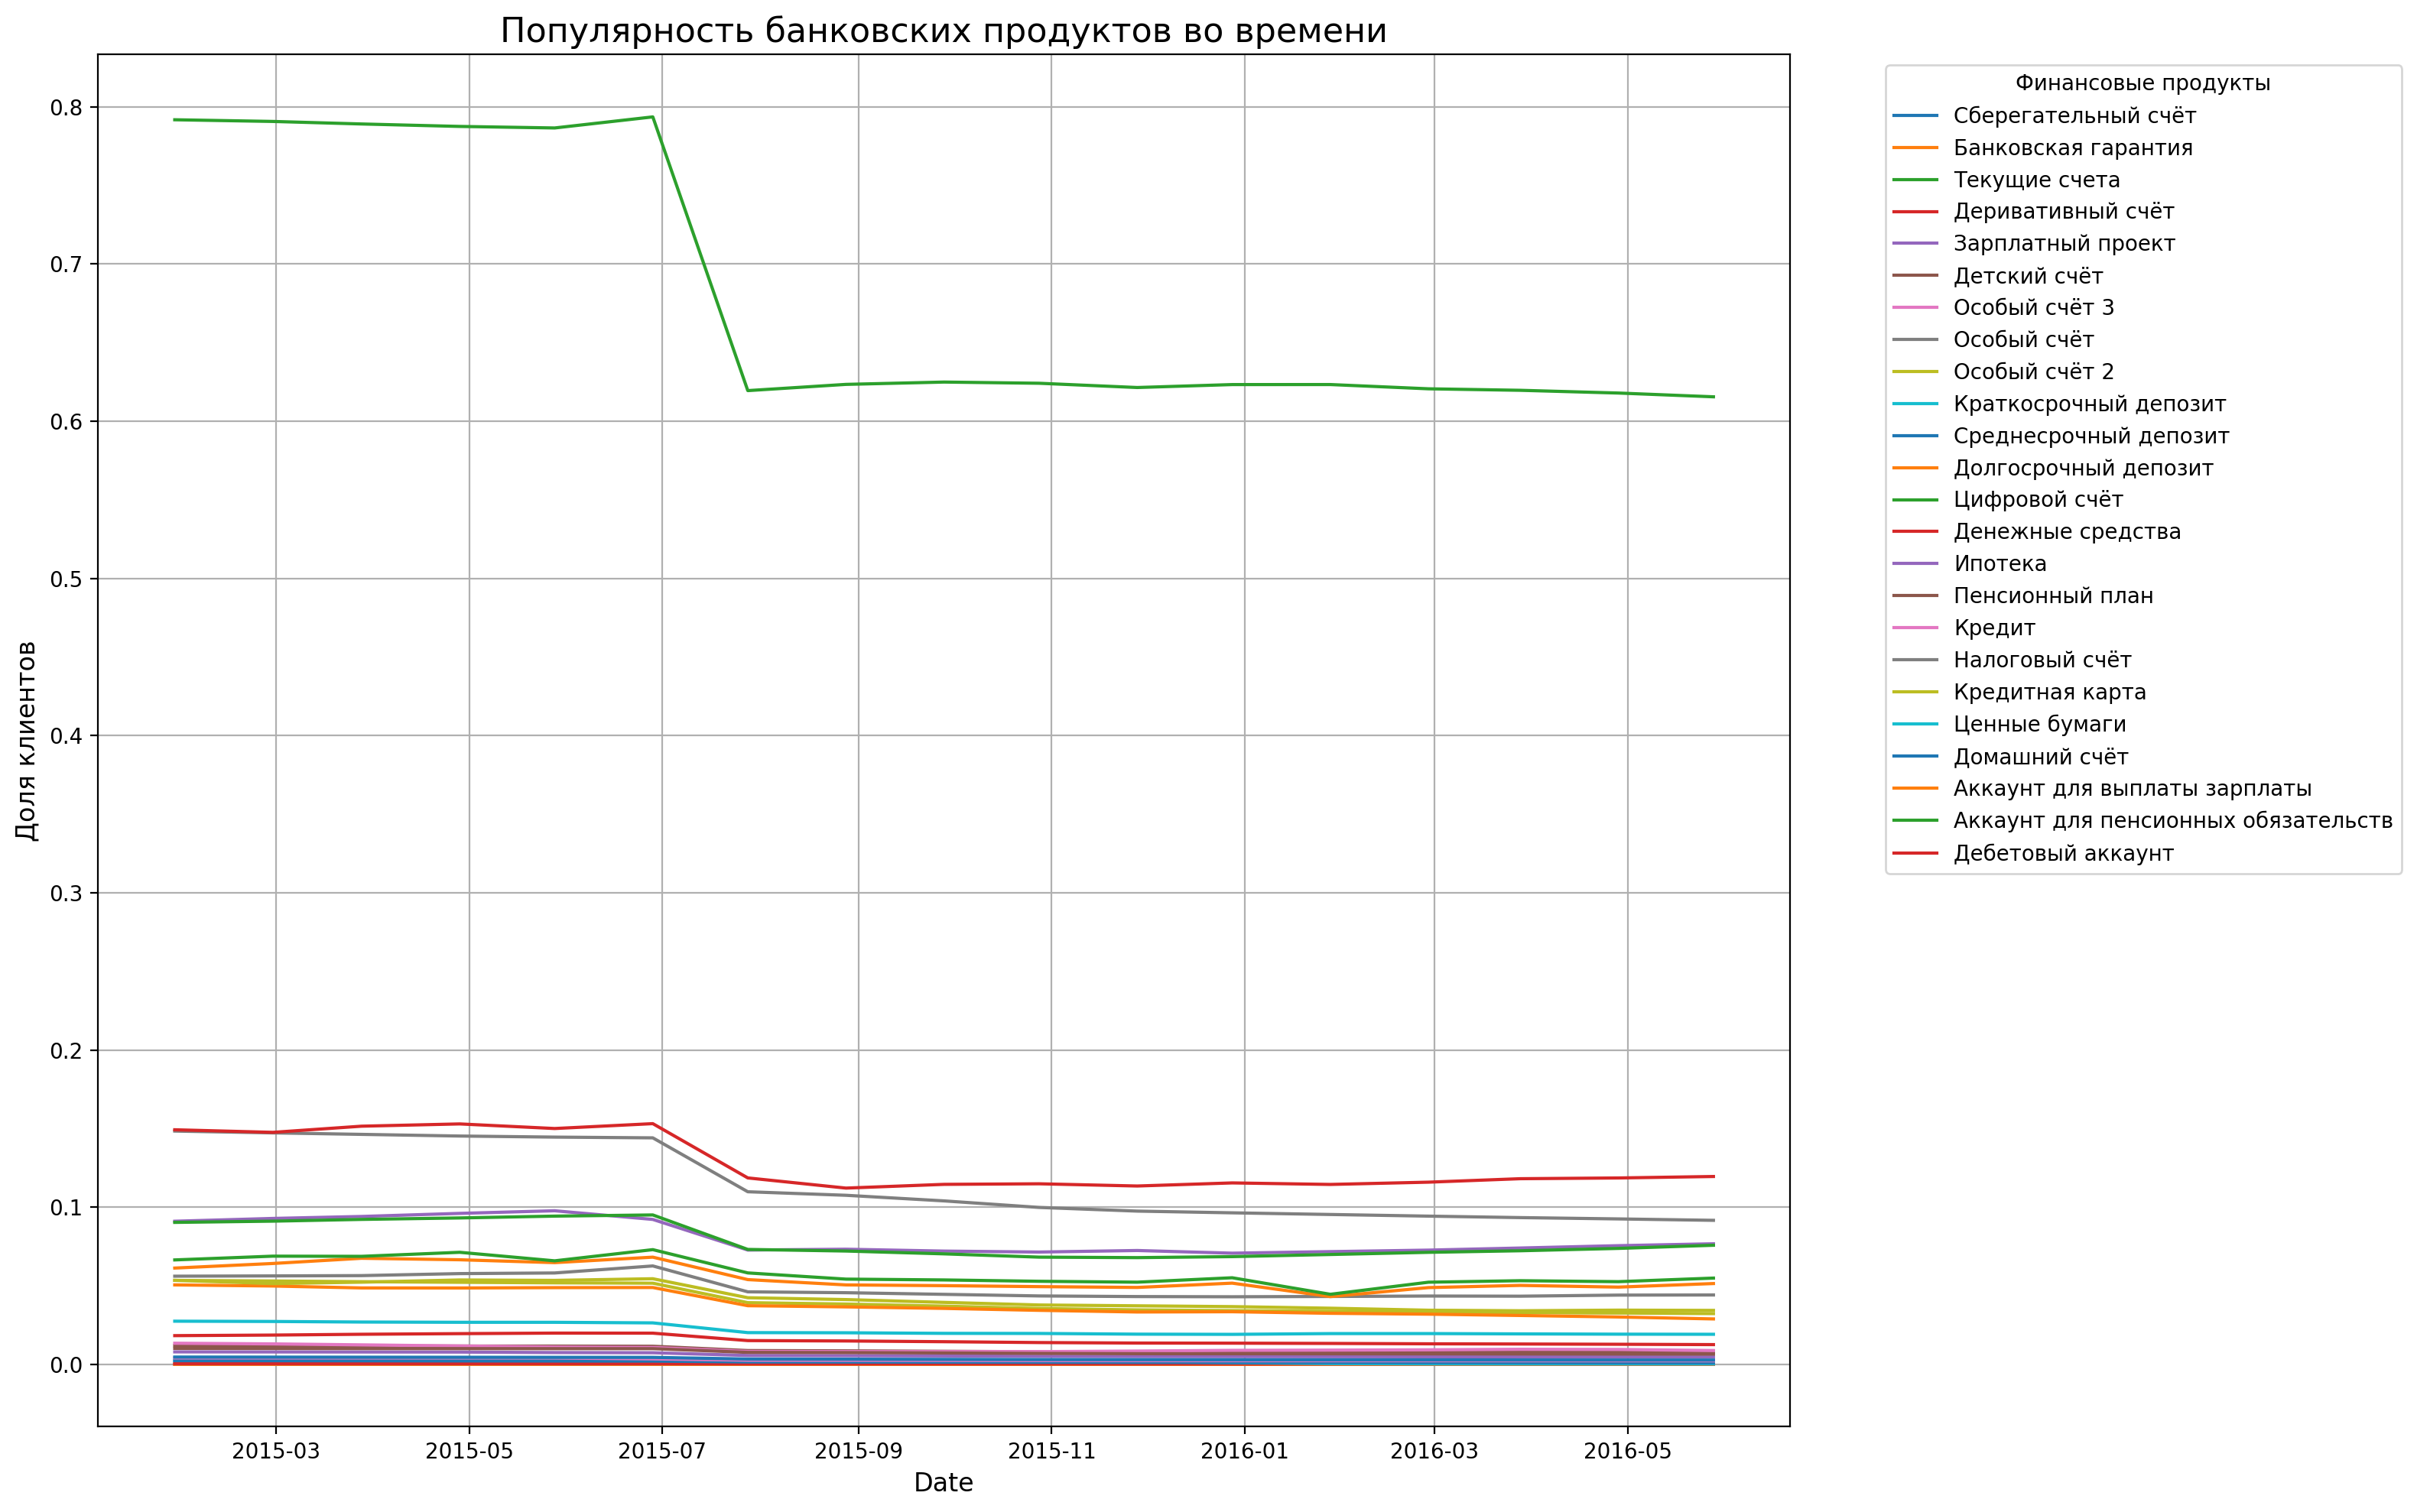

In [39]:
# Посмотрим как менялась доля использования банковских продуктов во времени
time_trends = data.groupby('fecha_dato')[target_columns].mean()

plt.figure(figsize=(16, 10))

for col in target_columns:
    plt.plot(time_trends.index, time_trends[col], label=column_names.get(col, col))

plt.title("Популярность банковских продуктов во времени", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Доля клиентов", fontsize=12)
plt.legend(title="Финансовые продукты", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Можно увидеть, что в июле 2015 года было уменьшение доли всех продуктов

# Выводы

Мы проанализировали данные, исправили типы и устранили в них пропуски. Проаназировали, какие банковские продукты пользовались спросом за время наблюдений, рассмотрели корреляцию между признаками. Выявили и устранили выбросы в данных и визуализировали распределения колличественных характеристик.